# Impact of feature transformation on model performance

## Import packages

In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# sklern regression packages
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import (
    train_test_split,
    KFold,
    cross_val_score,
    cross_val_predict,
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn import metrics

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# uncomment lab_black if working in jupyter lab
# use nb_black if working in jupyter notebook
# %load_ext lab_black
# %load_ext lab_black
# %load_ext nb_black

In [3]:
# plt style
plt.style.use("seaborn")

<ipython-input-3-5d30bd470961>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


## Load data

In [4]:
# access google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# load data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML_day_1/data/winequality-white_clean.csv")

In [6]:
# display data
data = data.drop("Unnamed: 0", axis=1)
print(data.shape)
data.head()

(4487, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Data preprocessing

In [7]:
# splitting df columns for X and y
# X independent variables
X = data.iloc[:, :-2]
y = data.iloc[:, 10]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40


## Train-test split

In [8]:
# 10% of data as validation set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=19
)
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

Training set has 4038 samples.
Testing set has 449 samples.


## Predict metrics variable

In [9]:
def predict_metrics(y_test, predictions):
    print('MAE', metrics.mean_absolute_error(y_test, predictions))
    print('MSE', metrics.mean_squared_error(y_test, predictions))
    print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('Explained Var Score', metrics.explained_variance_score(y_test, predictions))

## Feature transformation

In [10]:
# adapt data types to be fed into ML algorithms
# solve data represented in different scales
# number of features reduction to plot/visualize data, speed up training or accuracy

### StandardScaler

In [11]:
# pipeline w/ scaling and model
sc = StandardScaler()
model = LinearRegression()
pipeline = Pipeline ([("data_scaling", sc), ("estimator", model)])

# model fit and predict
lm_all = pipeline.fit(X_train, y_train)
y_pred_all = lm_all.predict(X_test)

# model performance
predict_metrics(y_test, y_pred_all)

MAE 0.27369587586662675
MSE 0.12330666751735274
RMSE 0.3511504912674233
Explained Var Score 0.9186473104847065


### MinMaxScaler

In [12]:
# pipeline w/ scaling and model
sc = MinMaxScaler()
model = LinearRegression()
pipeline = Pipeline([("data_scaling", sc), ("estimator", model)])

# model fit and predict
lm_all = pipeline.fit(X_train, y_train)
y_pred_all = lm_all.predict(X_test)

# model performance
predict_metrics(y_test, y_pred_all)

MAE 0.2736958758666258
MSE 0.12330666751735353
RMSE 0.3511504912674244
Explained Var Score 0.918647310484706


### RobustScaler

In [13]:
# pipeline w/ scaling and model
sc = RobustScaler()
model = LinearRegression()
pipeline = Pipeline([("data_scaling", sc), ("estimator", model)])

# model fit and predict
lm_all = pipeline.fit(X_train, y_train)
y_pred_all = lm_all.predict(X_test)

# model performance
predict_metrics(y_test, y_pred_all)

MAE 0.2736958758666269
MSE 0.12330666751735281
RMSE 0.3511504912674234
Explained Var Score 0.9186473104847065


### Normalizer

In [14]:
# pipeline w/ scaling and model
sc = Normalizer()
model = LinearRegression()
pipeline = Pipeline([("data_scaling", sc), ("estimator", model)])

# model fit and predict
lm_all = pipeline.fit(X_train, y_train)
y_pred_all = lm_all.predict(X_test)

# model performance
predict_metrics(y_test, y_pred_all)

MAE 0.8298081357446571
MSE 1.1321265311228188
RMSE 1.0640143472354209
Explained Var Score 0.25304941296003547


In [15]:
# SS, MMS and RS perform similarly, sticking to SS for further analysis

## Base model for comparison

In [16]:
# X/y data allocation
X = data.drop(columns="alcohol")
y = data["alcohol"]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# print train/test size
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

Training set has 4038 samples.
Testing set has 449 samples.


In [17]:
# define scaling and model
sc = StandardScaler()
model = LinearRegression()

# create pipeline
pipeline = Pipeline([("data_scaling", sc), ("estimator", model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_scaling', StandardScaler()),
                ('estimator', LinearRegression())])

In [18]:
# model performance
model_score = pipeline.score(X_test, y_test)
model_score

0.9300925884037994

In [19]:
# feature correlation
g = sns.pairplot(data)
g
None

Output hidden; open in https://colab.research.google.com to view.

In [20]:
# looks like some features could be linearized using 1/feature

## Linearization

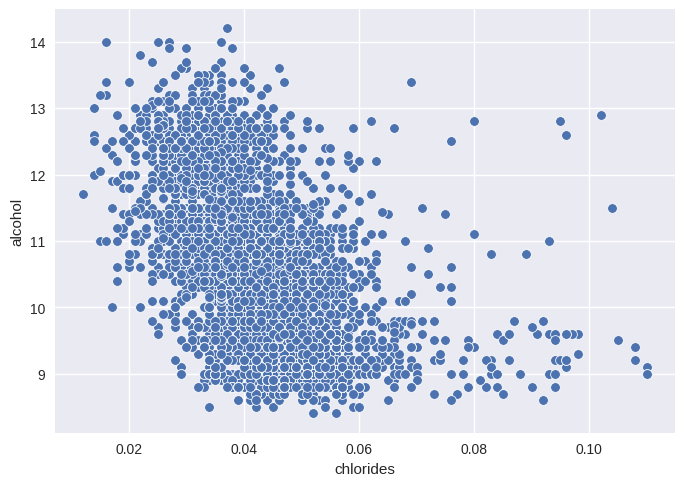

In [21]:
# 'clorides' variable shape suggests it could benefit from 1/feature procedure

# create data copy
data_inverse = data.copy()
g = sns.scatterplot(data=data_inverse, x="chlorides", y="alcohol")

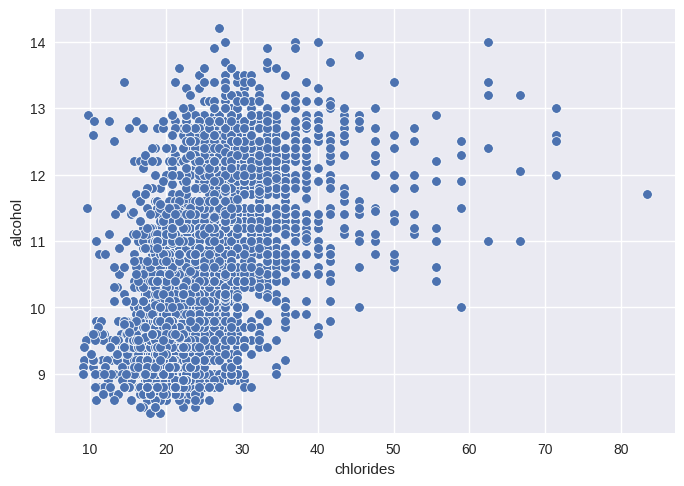

In [22]:
# 1/feature inverted 'chlorides' data
data_inverse["chlorides"] = 1 / data_inverse["chlorides"]
g = sns.scatterplot(data=data_inverse, x="chlorides", y="alcohol")

In [23]:
# X/y data allocation
X = data_inverse.drop(columns="alcohol")
y = data_inverse["alcohol"]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# print train/test size
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 4038 samples.
Testing set has 449 samples.


In [24]:
# define scaling and model
sc = StandardScaler()
model = LinearRegression()

# create pipeline
pipeline = Pipeline([("data_scaling", sc), ("estimator", model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_scaling', StandardScaler()),
                ('estimator', LinearRegression())])

In [25]:
# model performance
model_inverse_score = pipeline.score(X_test, y_test)
model_inverse_score

0.9299147872920216

### Performance vs base model

In [26]:
# difference
diff = (model_inverse_score - model_score) / model_score
print(f"The model with transformed feature is different by {diff*100:1.1f}%")

The model with transformed feature is different by -0.0%


## Log transformation

In [27]:
# solves skewed data to approximately conform to normality
# log-transformed data or a log-normal distribution will follow a normal/near normal distribution, thus reducing skewness

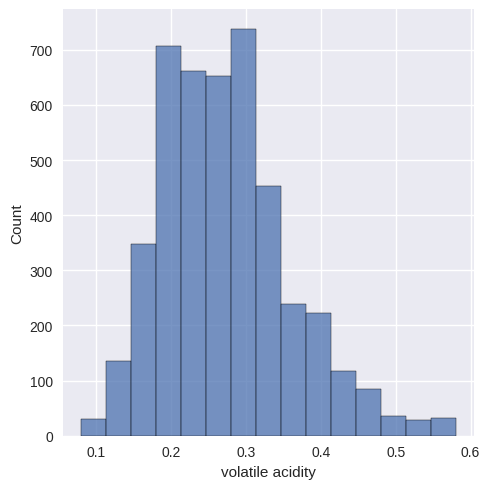

In [28]:
# 'volatile acidity' is skewed which means that the variable most likely follows a log-normal distribution

# copy data
data_log = data.copy()
ax = sns.displot(data=data_log, x="volatile acidity", bins=15)

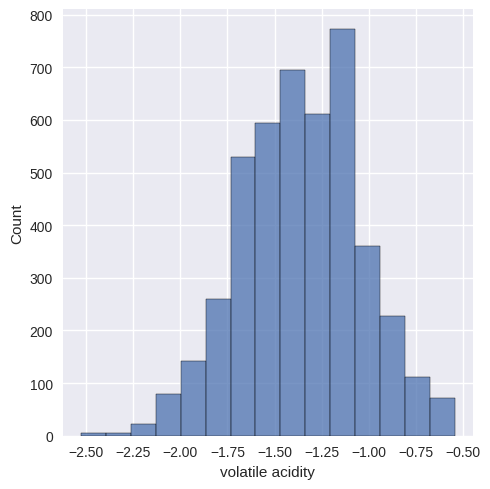

In [29]:
# log-normalized data
data_log["volatile acidity"] = np.log(data_log["volatile acidity"])
sns.displot(data=data_log, x="volatile acidity", bins=15)
None

In [30]:
# X/y data allocation
X = data_log.drop(columns="alcohol")
y = data_log["alcohol"]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# print train/test size
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

Training set has 4038 samples.
Testing set has 449 samples.


In [31]:
# define scaling and model
sc = StandardScaler()
model = LinearRegression()

# create pipeline
pipeline = Pipeline([("data_scaling", sc), ("estimator", model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_scaling', StandardScaler()),
                ('estimator', LinearRegression())])

In [32]:
# model performance
model_log_score = pipeline.score(X_test, y_test)
model_log_score

0.9303046947040241

### Performance vs base model

In [33]:
# difference
diff = (model_log_score - model_score) / model_score
print(f"The model with transformed feature is different by {diff*100:1.3f}%")

The model with transformed feature is different by 0.023%


## Boxcox transformation

In [34]:
# transform non-normal dependent variables into normal shape
# enables to run a broader number of tests

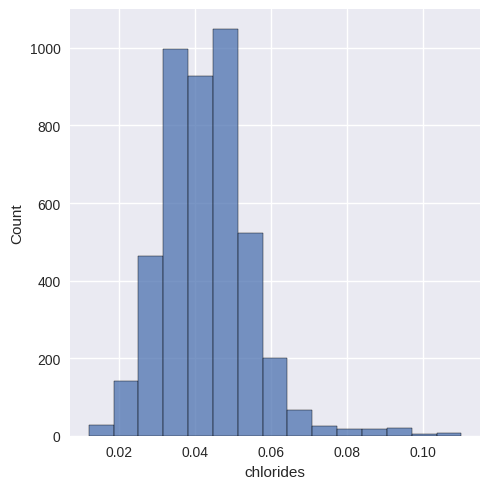

In [35]:
# copy data and ploz
data_bcox = data.copy()
_ = sns.displot(data=data_bcox, x="chlorides", bins=15)

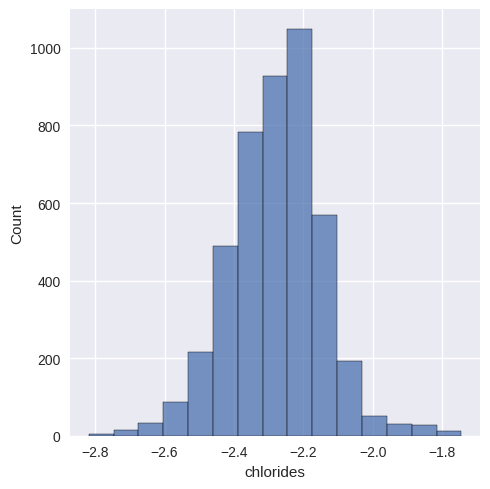

In [36]:
# boxcox transformed data
data_bcox["chlorides"] = stats.boxcox(data_bcox["chlorides"])[0]
_ = sns.displot(data=data_bcox, x="chlorides", bins=15)

In [37]:
# X/y data allocation
X = data_bcox.drop(columns="alcohol")
y = data_bcox["alcohol"]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# print train/test size
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

Training set has 4038 samples.
Testing set has 449 samples.


In [38]:
# define scaling and model
sc = StandardScaler()
model = LinearRegression()

# create pipeline
pipeline = Pipeline([("data_scaling", sc), ("estimator", model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_scaling', StandardScaler()),
                ('estimator', LinearRegression())])

In [39]:
# model performance
model_log_score = pipeline.score(X_test, y_test)
model_log_score

0.9300317353909748

### Performance vs base model

In [40]:
# difference
diff = (model_log_score - model_score) / model_score
print(f"The model with transformed feature is different by {diff*100:1.3f}%")

The model with transformed feature is different by -0.007%


## Conclusion

In [41]:
# there is no considerable difference for model scores in this case